In [1]:
import sys
sys.path.append("../")
import numpy as np 
import pandas as pd
from my_functions import library as lb 
import data_challenge_library as dcl 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
object_table = dcl.load_table(features ='savic',separate_AGN = True,
                              remove_missing_features=True)

Original Table has 446487 sources
Keeping 432767 labeled sources
Keeping only the required 62 features
Keeping 142963 with all features available
class
Star    56532
Gal     53331
Qso     32780
Agn       320
Name: count, dtype: int64


In [12]:
keep = ["label", "class", "photoZ_pest", "z",
        "psMag_u", "psMagErr_u", "psMag_g","psMagErr_g",
        "psMag_r", "psMagErr_r", "psMag_i", "psMagErr_i",
        "psMag_z", "psMagErr_z", "psMag_y", "psMagErr_y"]

object_table = object_table[keep]
object_table = object_table[object_table["label"]>=2]
print(len(object_table))




89827


In [13]:
magnitudes, features = lb.two_2_three(object_table, extra_features=["label", "class", "photoZ_pest", "z"],
                                      has_wavelength = False)

In [24]:
nomi_filtri= ["SDSS.u", "SDSS.g", "SDSS.r", "SDSS.i", "SDSS.z", "UKIDSS.y"]
filtri = [lb.filtro(i) for i in nomi_filtri]
wavlen = [i.wav for i in filtri]

In [25]:
luminosity = np.zeros((magnitudes.shape[0], magnitudes.shape[1], 3))
luminosity[:,:, 1:] = magnitudes
luminosity[:,:, 0] = wavlen
luminosity = lb.get_luminosity(luminosity, features["z"].to_numpy(), H0 =70, Om0=0.3)
                      

In [27]:
L3000 = np.zeros(len(luminosity))
for i, L in enumerate(luminosity):
    L3000[i] = np.interp(3000, L[:,0],L[:,1] )

/tmp/ipykernel_1750200/2241235873.py:5: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(features["z"], np.log10(L3000), s =0.5, color = 'royalblue', label = "QSO")


/tmp/ipykernel_1750200/2241235873.py:7: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(features["z"][logic], np.log10(L3000[logic]), c ='r', marker ='*', s = 2, label = "AGN")


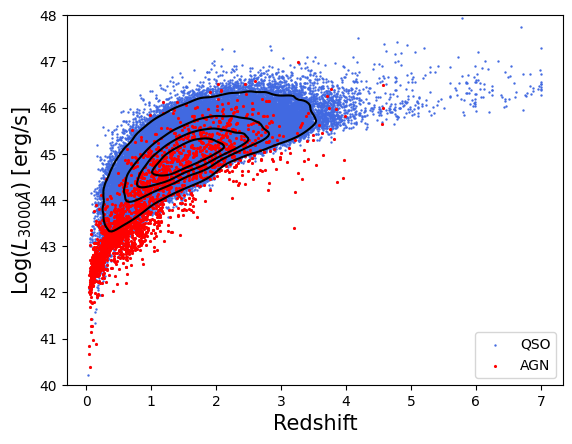

In [42]:
logic = features["label"]==3

fig, ax = plt.subplots()

ax.scatter(features["z"], np.log10(L3000), s =0.5, color = 'royalblue', label = "QSO")
sns.kdeplot(x=features["z"][~logic], y= np.log10(L3000[~logic]), ax =ax, levels = 5, color = 'k')
ax.scatter(features["z"][logic], np.log10(L3000[logic]), c ='r', marker ='*', s = 2, label = "AGN")
ax.set_xlabel("Redshift", fontsize =15)
ax.set_ylabel(r"Log($L_{3000\AA}$) [erg/s]", fontsize = 15)
ax.set_ylim(40, 48)
ax.legend(loc = "lower right")

plt.savefig("L_z.png", bbox_inches = "tight")

In [1]:
83130+1089


84219